In [1]:
from proj_utils import *
import os, struct
import numpy as np
import cv2

In [128]:
path = os.path.join(os.path.curdir, 'data')
x_train, y_train = load_NMNIST('training', digits=[0,1,2], path=path)
x_test, y_test = load_NMNIST('testing', digits=[0,1,2], path=path)

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Checking multiple training vectors by plotting images.
Be patient:


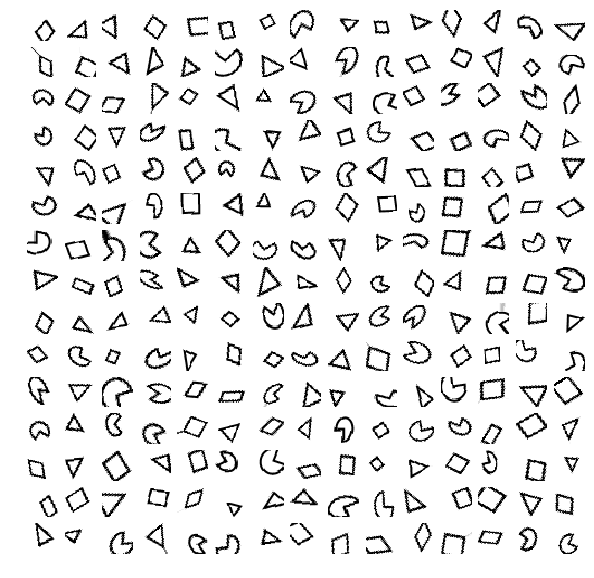

In [44]:
datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

batch = datagen.flow(x, batch_size=15*15)
inp = next(batch)
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
i = 0
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        v = inp[i]
        i += 1
        plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
        plt.axis('off')
plt.show()

In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [79]:
# dimensions of our images.
img_width, img_height = 28, 28

epochs = 50
batch_size = 16
input_shape = (img_width, img_height, 1)

In [121]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, (1, 1), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        64        
_________________________________________________________________
activation_41 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
activation_42 (Activation)   (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          18496     
__________

In [123]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [124]:
train_datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [129]:
x_train = np.reshape(x_train, (len(x_train), 28,28, 1))
x_test = np.reshape(x_test, (len(x_test), 28,28, 1))
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [130]:
train_generator = train_datagen.flow(x_train, y_train,
                                     #target_size=(img_width, img_height),
                                     #class_mode='categorical',
                                     batch_size=batch_size)
validation_generator = test_datagen.flow(x_test, y_test)

In [152]:
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=x_test.shape[0] // batch_size)

Epoch 1/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0548 - acc: 0.9819 - val_loss: 1.0578 - val_acc: 0.8489
Epoch 2/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0546 - acc: 0.9824 - val_loss: 1.0205 - val_acc: 0.8542
Epoch 3/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0566 - acc: 0.9814 - val_loss: 0.8175 - val_acc: 0.8659
Epoch 4/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0540 - acc: 0.9821 - val_loss: 0.8224 - val_acc: 0.8632
Epoch 5/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0533 - acc: 0.9825 - val_loss: 0.9899 - val_acc: 0.8437
Epoch 6/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0564 - acc: 0.9815 - val_loss: 0.8775 - val_acc: 0.8687
Epoch 7/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0547 - acc: 0.9822 - val_loss: 0.7578 - val_acc: 0.8722
Epoch 8/50
3750/3750 [==============================] -

In [153]:
model.save_weights('first_try.h5')

In [154]:
probabilities = model.predict_generator(validation_generator)

In [155]:
from sklearn.metrics import confusion_matrix

y_pred = probabilities > 0.5
print(y_pred.shape)
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

(10000, 3)


array([[1618,  789,  983],
       [1610,  806,  877],
       [1556,  814,  947]])

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.34      0.48      0.40      3390
          1       0.33      0.24      0.28      3293
          2       0.34      0.29      0.31      3317

avg / total       0.34      0.34      0.33     10000



In [157]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))


0.3371

In [158]:
iv3_test_scores = model.evaluate_generator(validation_generator)
print("Accuracy: %.2f%%" % (iv3_test_scores[1]*100))

Accuracy: 85.96%
